In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Load dữ liệu Iris
iris = load_iris()
X = iris.data
y = iris.target

# Chuyển dữ liệu thành DataFrame để dễ quan sát
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# khai phá dữ liệu
# Thống kê thông tin cơ bản
print("Thông tin dataset:")
print(df.info())
print("\nTóm tắt thống kê:")
print(df.describe())



Thông tin dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None

Tóm tắt thống kê:
       sepal length (cm)  sepal width (cm)  petal length (cm)   
count         150.000000        150.000000         150.000000  \
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%         

In [5]:
# Kiểm tra phân phối nhãn (target)
print("\nPhân phối của các lớp target:")
print(df['target'].value_counts())

# Kiểm tra giá trị thiếu
print("\nKiểm tra giá trị thiếu:")
print(df.isnull().sum())




Phân phối của các lớp target:
target
0    50
1    50
2    50
Name: count, dtype: int64

Kiểm tra giá trị thiếu:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [10]:
# Điền giá trị thiếu bằng giá trị trung bình
df.fillna(df.mean(), inplace=True)


In [11]:
# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


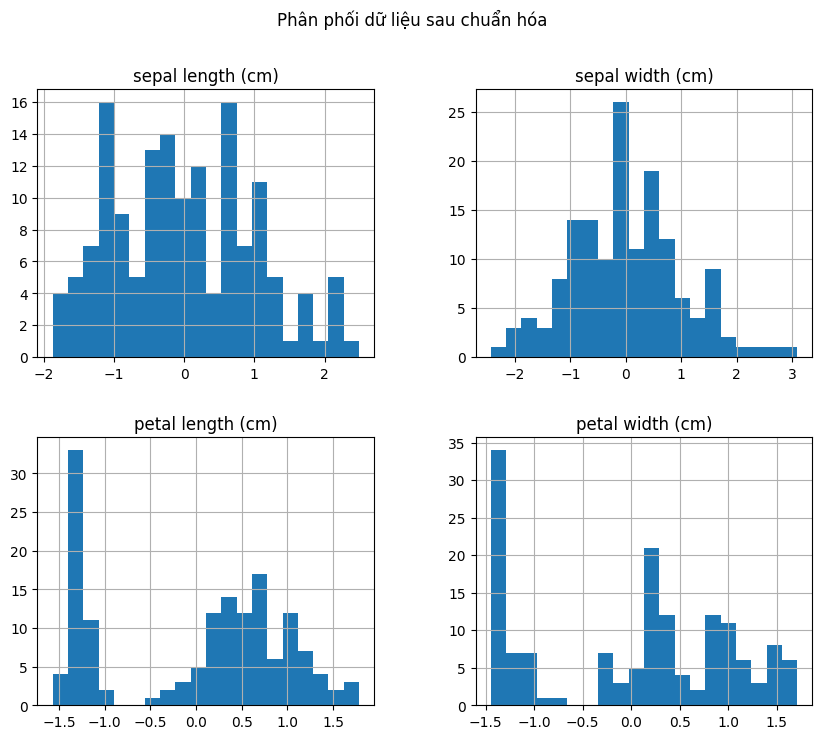

In [13]:
# Vẽ phân phối dữ liệu sau chuẩn hóa
scaled_df = pd.DataFrame(X_scaled, columns=iris.feature_names)
scaled_df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Phân phối dữ liệu sau chuẩn hóa")
plt.show()


In [15]:
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [17]:
# Huấn luyện Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)


Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



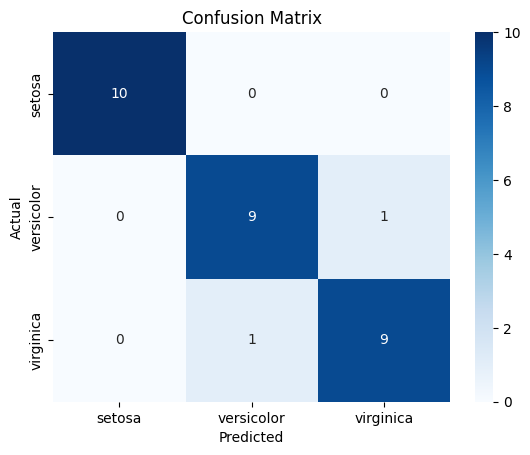

In [19]:
from sklearn.metrics import classification_report

# Đánh giá
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Vẽ ma trận lỗi
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [22]:
# Phân tích sai số
errors = np.where(y_pred != y_test)[0]
print(f"Số lượng dự đoán sai: {len(errors)}")
print(f"Index của các dự đoán sai: {errors}")


Số lượng dự đoán sai: 2
Index của các dự đoán sai: [23 25]


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)   
0           0.310998         -1.052767           1.046945          0.264142  \
1           1.038005         -0.131979           0.705921          0.659038   

   actual_class  predicted_class  
0             2                1  
1             1                2  


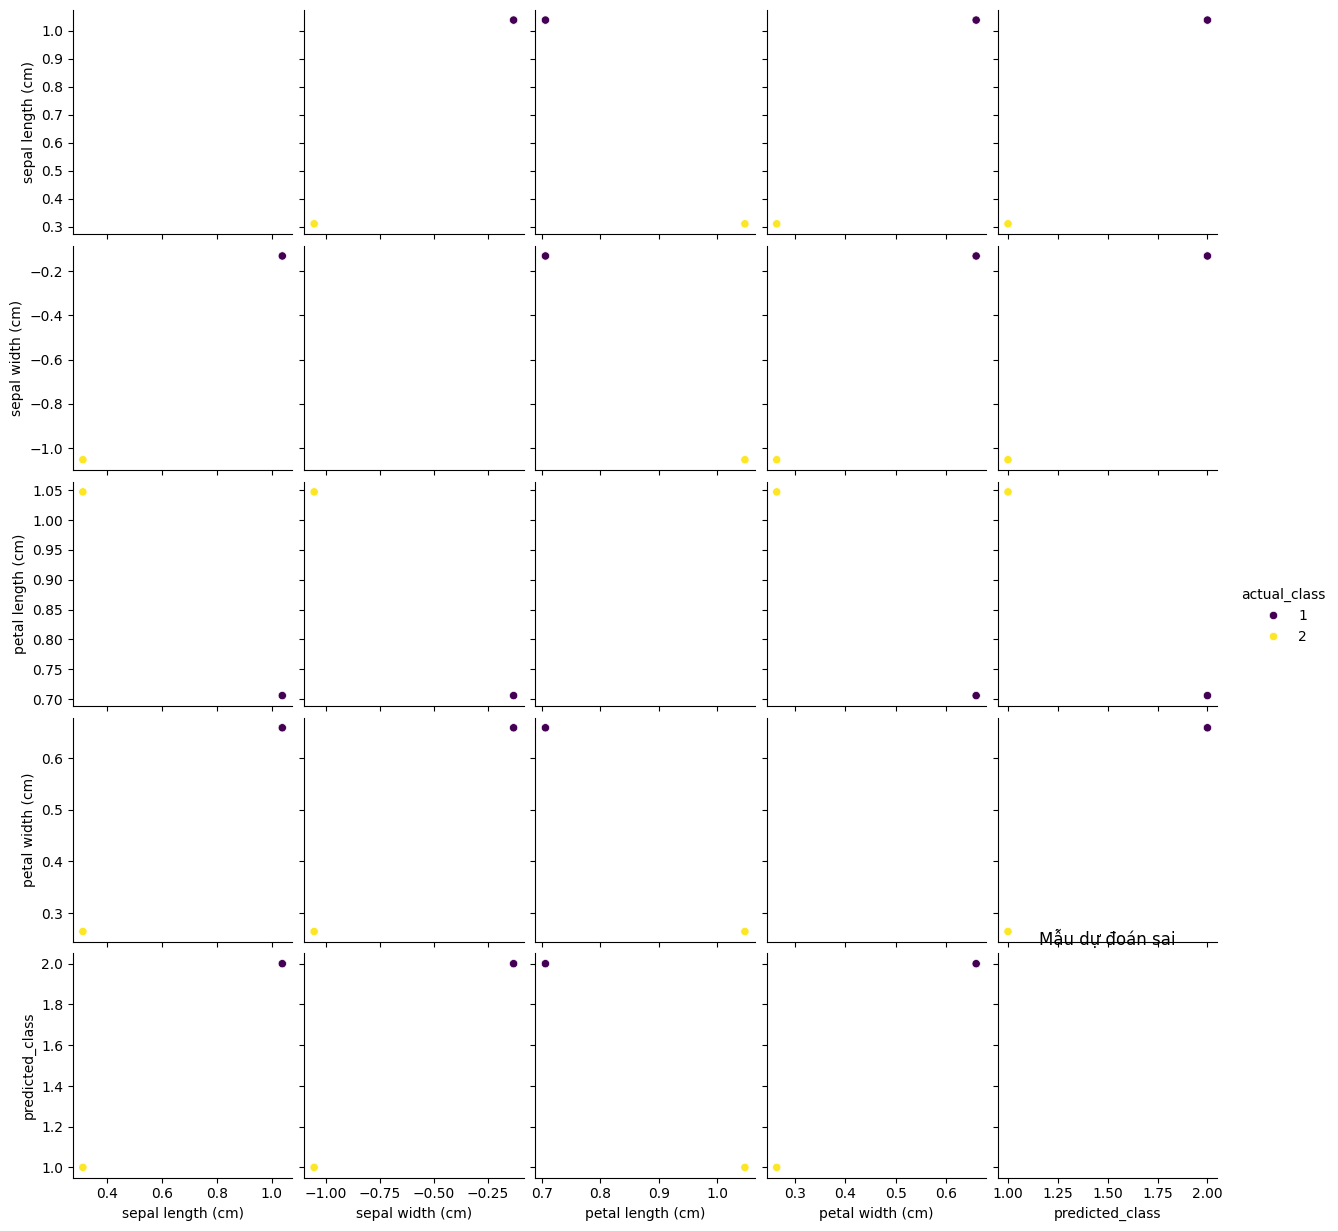

In [23]:
# Lấy các mẫu dự đoán sai
error_samples = X_test[errors]

# Hiển thị các mẫu sai trong DataFrame
error_df = pd.DataFrame(error_samples, columns=iris.feature_names)
error_df['actual_class'] = y_test[errors]
error_df['predicted_class'] = y_pred[errors]
print(error_df)

# Vẽ biểu đồ trực quan hóa
sns.pairplot(data=error_df, hue='actual_class', palette="viridis")
plt.title("Mẫu dự đoán sai")
plt.show()
